<a href="https://colab.research.google.com/github/David-ZZ/David-ZZ/blob/main/ex2_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2.2 データの可視化

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
iris = sm.datasets.get_rdataset('iris', 'datasets').data
iris.head()
#>    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
#> 0           5.1          3.5           1.4          0.2  setosa
#> 1           4.9          3.0           1.4          0.2  setosa
#> 2           4.7          3.2           1.3          0.2  setosa
#> 3           4.6          3.1           1.5          0.2  setosa
#> 4           5.0          3.6           1.4          0.2  setosa

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 2.2.1 ヒストグラム

array([[<Axes: title={'center': 'Sepal.Length'}>]], dtype=object)

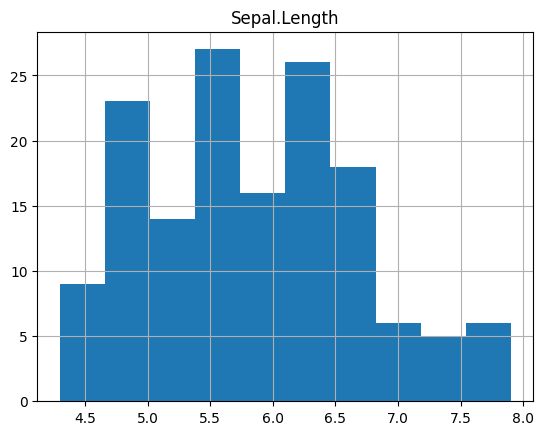

In [2]:
iris.hist('Sepal.Length')

array([[<AxesSubplot: title={'center': 'x'}>]], dtype=object)

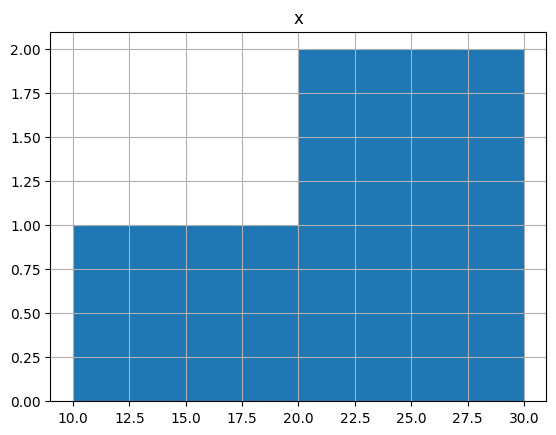

In [ ]:
my_df = pd.DataFrame(
    {'x': [10, 20, 30]})
my_df.hist('x', bins=2) # 階級数は2

array([[<Axes: title={'center': 'Sepal.Length'}>]], dtype=object)

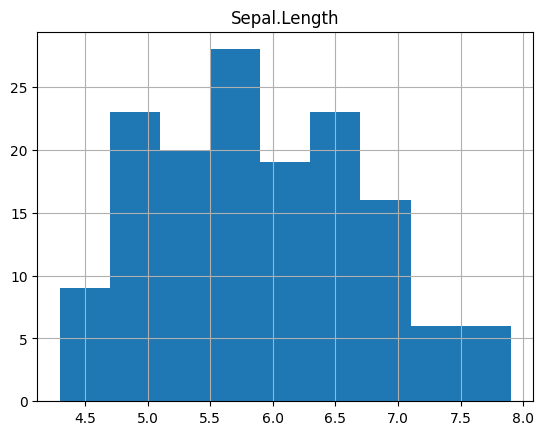

In [3]:
x = iris['Sepal.Length']
tmp = np.linspace(min(x), max(x), 10)
iris.hist('Sepal.Length',
          bins=tmp.round(2))

### 4.2.2 散布図

<AxesSubplot: xlabel='Sepal.Length', ylabel='Sepal.Width'>

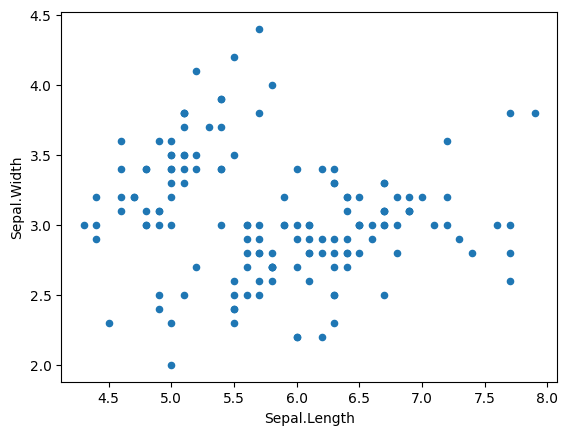

In [ ]:
iris.plot('Sepal.Length',  'Sepal.Width',  kind='scatter')

### 4.2.3 箱ひげ図

<Axes: >

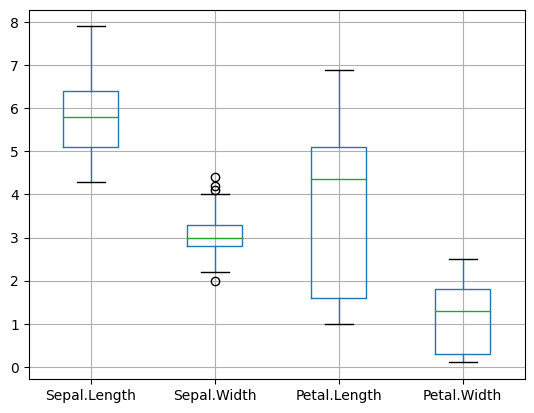

In [4]:
iris.boxplot()

### 4.2.4 棒グラフとエラーバー

In [7]:
pd.options.display.float_format = (
    '{:.2f}'.format)
my_df = (iris.describe().transpose()
    [['mean', 'std']])
my_df['se'] = (my_df['std'] /
               len(iris)**0.5)
my_df
#>               mean  std   se
#> Sepal.Length  5.84 0.83 0.07
#> Sepal.Width   3.06 0.44 0.04
#> Petal.Length  3.76 1.77 0.14
#> Petal.Width   1.20 0.76 0.06

,mean,std,se
Sepal.Length,5.84,0.83,0.07
Sepal.Width,3.06,0.44,0.04
Petal.Length,3.76,1.77,0.14
Petal.Width,1.20,0.76,0.06


<Axes: >

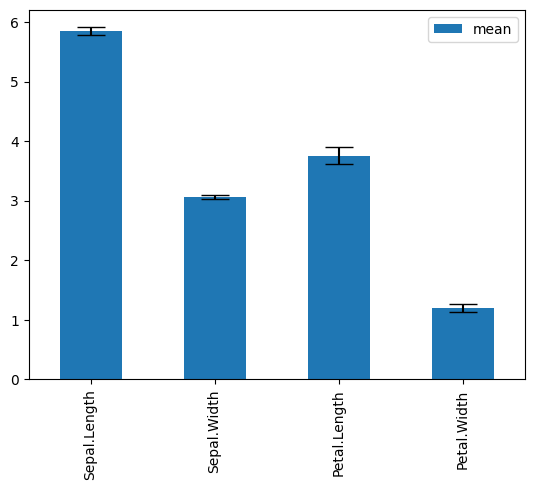

In [8]:
my_df.plot(y='mean', kind='bar', yerr='se', capsize=10)

In [5]:
my_group = iris.groupby('Species')                    # 品種ごとに，
my_df = my_group.agg('mean')                          # 各変数の，平均と
my_se = my_group.agg(lambda x: x.std() / len(x)**0.5) # 標準誤差を求める．
my_se
#>             Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
#> Species
#> setosa              0.05         0.05          0.02         0.01
#> versicolor          0.07         0.04          0.07         0.03
#> virginica           0.09         0.05          0.08         0.04

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,0.049850,0.053608,0.024560,0.014904
versicolor,0.072998,0.044378,0.066455,0.027966
virginica,0.089927,0.045608,0.078050,0.038841


<AxesSubplot: xlabel='Species'>

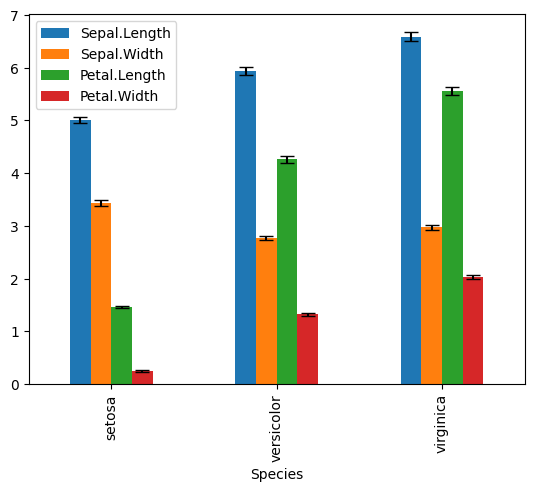

In [ ]:
my_group.agg('mean').plot(kind='bar', yerr=my_se, capsize=5)

### 4.2.5 モザイクプロット

(<Figure size 640x480 with 3 Axes>,
 {('setosa', 'True'): (0.0, 0.0, 0.33003300330033003, 0.8372093023255813),
  ('setosa', 'False'): (0.0,
   0.8405315614617939,
   0.33003300330033003,
   0.159468438538206),
  ('versicolor', 'True'): (0.334983498349835,
   0.0,
   0.33003300330033003,
   0.15946843853820597),
  ('versicolor', 'False'): (0.334983498349835,
   0.1627906976744186,
   0.33003300330033003,
   0.8372093023255813),
  ('virginica', 'True'): (0.66996699669967,
   0.0,
   0.3300330033003301,
   0.3388704318936877),
  ('virginica', 'False'): (0.66996699669967,
   0.34219269102990035,
   0.3300330033003301,
   0.6578073089700995)})

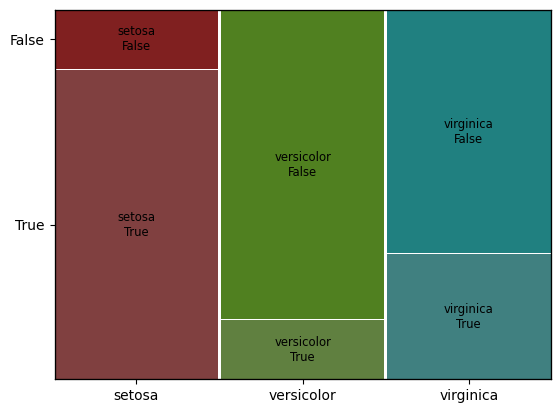

In [9]:
from statsmodels.graphics.mosaicplot \
    import mosaic

my_df = pd.DataFrame({
    'Species': iris.Species,
    'w_Sepal': iris['Sepal.Width'] > 3})

my_table = pd.crosstab( # 分割表
    my_df['Species'],
    my_df['w_Sepal'])
my_table
#> w_Sepal     False  True
#> Species
#> setosa          8     42
#> versicolor     42      8
#> virginica      33     17

mosaic(my_df,
       index=['Species', 'w_Sepal'])

(<Figure size 640x480 with 3 Axes>,
 {('setosa', 'True'): (0.0, 0.0, 0.33003300330033003, 0.8372093023255813),
  ('setosa', 'False'): (0.0,
   0.8405315614617939,
   0.33003300330033003,
   0.159468438538206),
  ('versicolor', 'True'): (0.334983498349835,
   0.0,
   0.33003300330033003,
   0.15946843853820597),
  ('versicolor', 'False'): (0.334983498349835,
   0.1627906976744186,
   0.33003300330033003,
   0.8372093023255813),
  ('virginica', 'True'): (0.66996699669967,
   0.0,
   0.3300330033003301,
   0.3388704318936877),
  ('virginica', 'False'): (0.66996699669967,
   0.34219269102990035,
   0.3300330033003301,
   0.6578073089700995)})

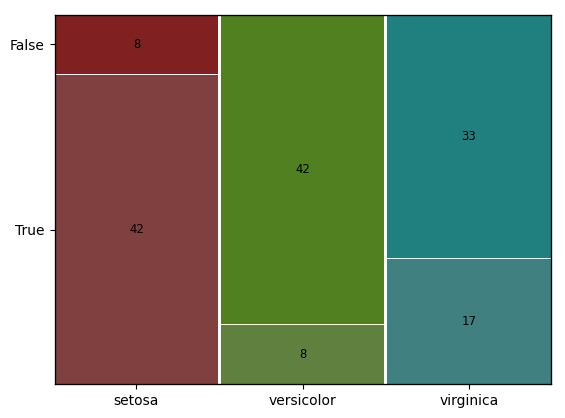

In [ ]:
my_table.columns = [str(x) for x in my_table.columns]
my_table.index   = [str(x) for x in my_table.index]
mosaic(my_df, index=['Species', 'w_Sepal'], labelizer=lambda k: my_table.loc[k])

### 4.2.6 関数のグラフ

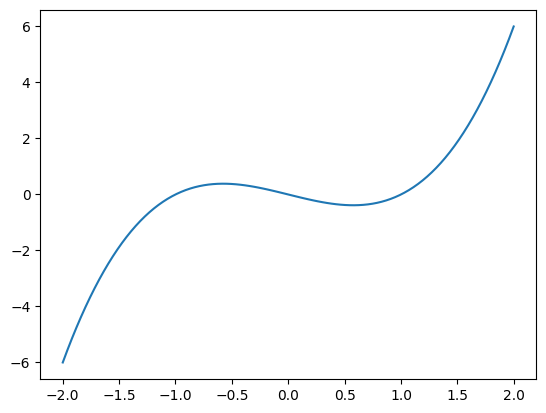

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2, 2, 100)
y = x**3 - x
plt.plot(x, y)